# Chapter 2:

**Expressions**

>* `univariate regression` means you have one target to predict. 
>* `Mutltivariate regression` means you predict multiple targets.
>* `multiple regression` means you have multiple features to be used in the model.

>* Although the `RMSE` is generally the preferred performance measure for regression tasks, sometimes we use `MAE` (In case of outliers).
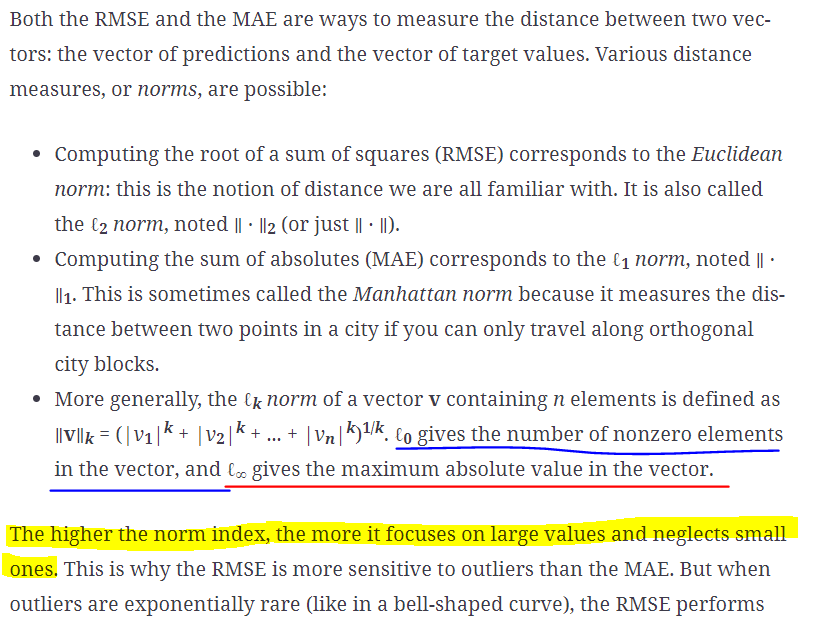 
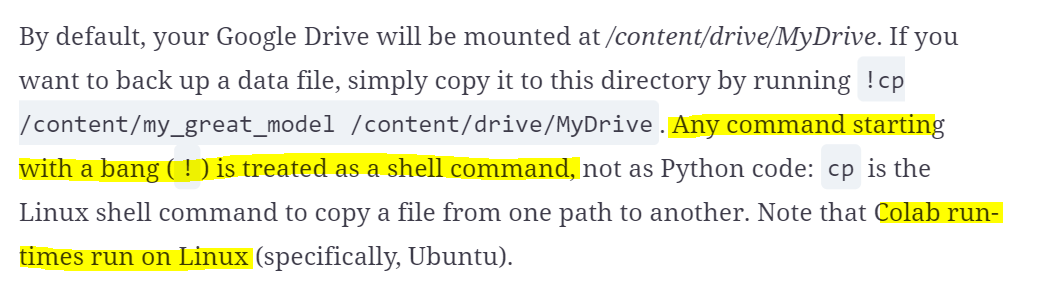
____________________

In [1]:
# This code is to scrap a .tgz file "similar to zip" from the web and extract it in a certain path (named "datasets" in this jupytern environment). 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import tarfile
import urllib.request


def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv("datasets/housing/housing.csv")
df = load_housing_data()

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df['ocean_proximity'].value_counts(dropna = False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### split the data into numberic and categorical:

In [4]:
numeric_df = df.select_dtypes(exclude = ['object'])
categor_df = df.select_dtypes(exclude = [np.number] )

numeric_df.describe() # "NaN" values is not taken into consideration

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


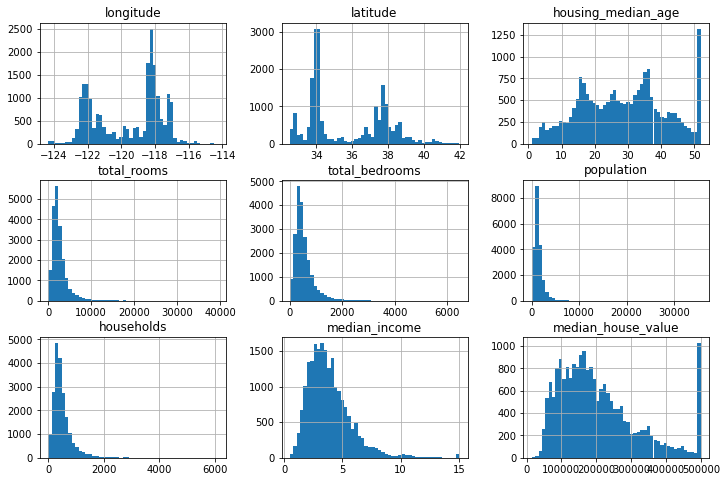

In [5]:
numeric_df.hist(bins= 50 ,figsize=(12,8));

#### Insights from the above plot:
>* **Looking on the feature values,** `median_income` doesn't look reasonable (peoplle income cannot be only 5 or 15 dollar)... after asking the team who collected data, we found 5 dollars means 50 000 dollar.
>* **Looking at the skewness,** most of the data have high skewness that we should handle by taking power transformation (Log or sqrt ..., etc.)
>* **Looking at the odd occurences,** `median_house_value` & `housing_mdedian_age`shows odd at (value 50) ... this has two interpretations:
>>* May be those feature values doesn't exceed 50.
>>* May be the team has set any value beyond 50 to be 50.<font color = 'red'> *In such cases, you may drop this value (in order not to mislead the model) or choose the proper value for those features beyound 50.*<font>
____________________

❓❓ **Data snooping bias** ❓
>It may seem strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which also means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of machine learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected. This is called *data snooping* bias.

________________

#### Important Notes about `train_test_split`:
>* `x` fed into the `train_test_split` should be 2D ... but `y` can be 1D or 2D (and this affects the resulted `y_train`, `y_test`)
>* stratify can be **`stratify = True`** or **`stratify = y`**
>|A|B|
>|-|-|
>|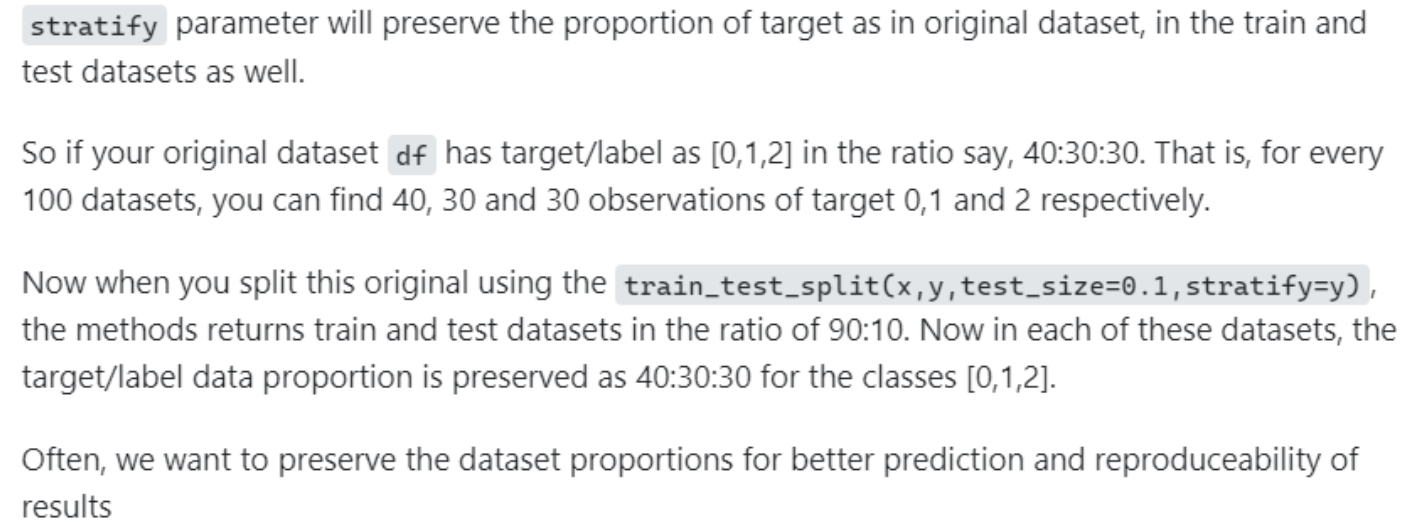 |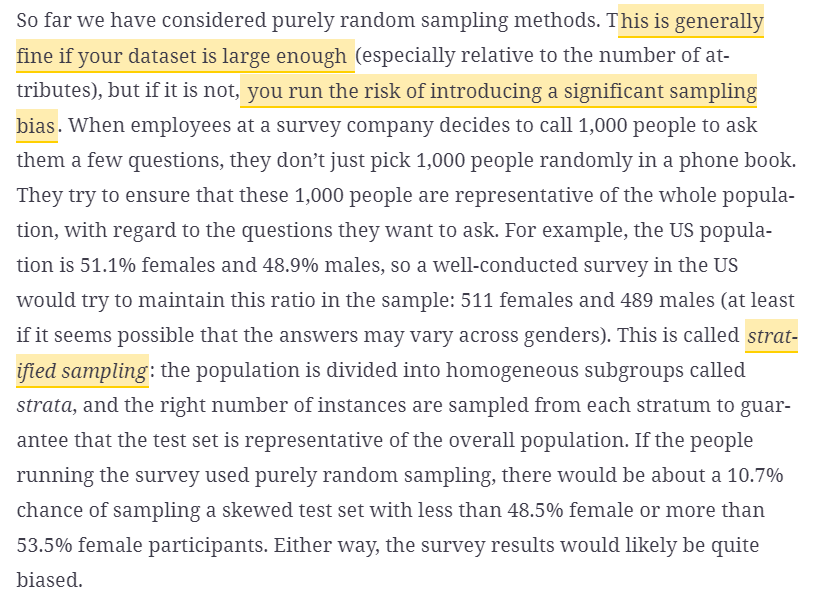


#### Important note for splitting:
>* You should pay attention when you update your data not to affect the previous data ... like that (if the original data have certain instances in the 80% train and another certain instances in 20% test), if you add more data and schffuled, you should assert that none of the test-instances became in the train or vice versa...
> you can do this by assiging an unique idintifier for each instance.


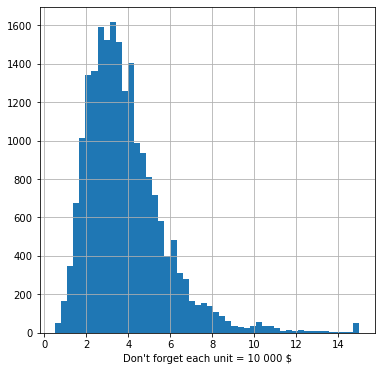

In [6]:
df['median_income'].hist(figsize=(6,6),bins = 50)
plt.xlabel("Don't forget each unit = 10 000 $");

#### If we want to apply stratify in current case:
>* we cannot set `stratify = True` or `stratify = y` because our label is continous and stratify divide on the categorical columns.
>* Therefore we may use `cut` or `qcut` to make a categorical copy of our current continous label... then set `stratify = df['income_cat']` ... Note: `income_cat` is not our label but we want our data to be representative of all incomes. 
>* but <font color = 'red'>**TAKE CARE**</font> you may fall in the trap of **imbalanced data** if some divided categories are two small.


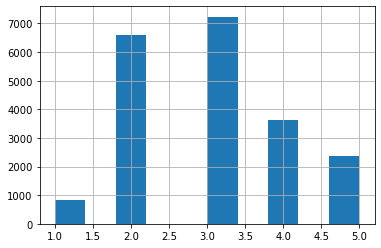

In [7]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df['income_cat'].hist();

In [8]:
from sklearn.model_selection import train_test_split

x = df[[col for col in df.columns if col not in ['median_house_value','income_cat']] ] # we use 'income_cat' only for stratify.
y = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, stratify = df['income_cat'], test_size = 0.2)

x_test.shape , x_train.shape

((4128, 9), (16512, 9))

In [9]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,<1H OCEAN
9985,-118.34,34.00,49.0,2863.0,411.0,1108.0,406.0,5.8993,<1H OCEAN
20434,-117.24,33.23,21.0,1718.0,308.0,1194.0,312.0,3.4359,<1H OCEAN
5940,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,NEAR BAY
13188,-122.42,37.65,39.0,4402.0,894.0,2941.0,887.0,3.8565,NEAR OCEAN


In [10]:
# same percentage appears in both to indicate that `stratify` works well

#x_test['income_cat'].value_counts(dropna = False) / len(x_test)
#x_train['income_cat'].value_counts(dropna = False) / len(x_train)

#### Exploring the data:


>**Before you explore the data:**
>* Do your exploration only on the train_data
>* It is a good practice to save a copy of your train_data in case you need the original of it. `housing_x = x_train.copy()` , `housing_y = y_train.copy()`

In [11]:
housing_x = x_train.copy() 
housing_y = y_train.copy()
housing = pd.concat([housing_x, housing_y], axis = 1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17950,-118.15,34.16,52.0,1925.0,597.0,2258.0,594.0,1.6921,<1H OCEAN,162500.0
19445,-118.48,34.05,48.0,3623.0,528.0,1282.0,516.0,9.5221,<1H OCEAN,500001.0
15413,-118.25,33.93,42.0,657.0,147.0,526.0,132.0,2.5000,<1H OCEAN,110200.0
4371,-120.54,38.07,37.0,736.0,148.0,339.0,140.0,2.2875,INLAND,79900.0
2921,-117.32,33.17,18.0,2143.0,299.0,828.0,283.0,4.2383,NEAR OCEAN,239000.0


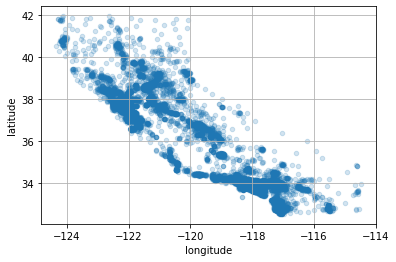

In [12]:
housing.plot(kind='scatter',x='longitude', y='latitude', grid = True,alpha = 0.2)
plt.show()

# we can integrate Tableau and show the geograpical map ... because each dot not represents a district on the map 
# as our axes are the intersection of longitude and latitude

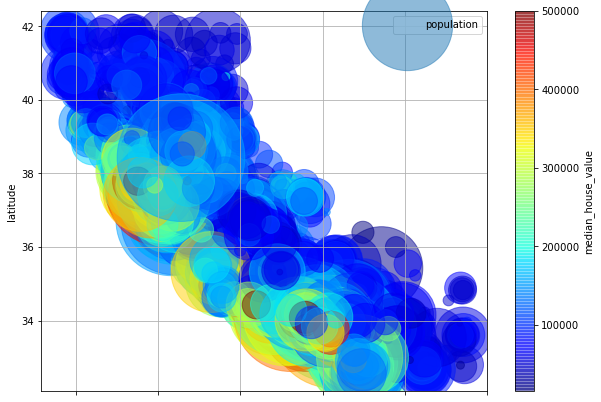

In [13]:
housing.plot(kind = 'scatter', x='longitude', y ='latitude', grid = True,
             s= housing['population'], label = 'population', legend = True,
             c='median_house_value', cmap ='jet', colorbar=True,
             alpha = 0.5, figsize=(10,7));
# the plot isnot appropriate (we can reduce scale the population values)

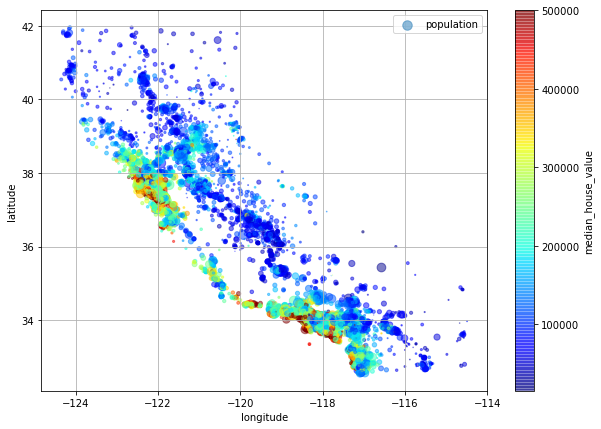

In [14]:
housing.plot(kind = 'scatter', x='longitude', y ='latitude', grid = True,
             s= housing['population']/90, label = 'population', legend = True,
             c='median_house_value', cmap ='jet', colorbar=True,
             alpha = 0.5, figsize=(10,7), sharex = False);

# we set sharex = False ... to prevent the colorbar to take the xticks values

#### Insights from the above plot
>As we know the above plot simulate the map of califorinia like this:
> 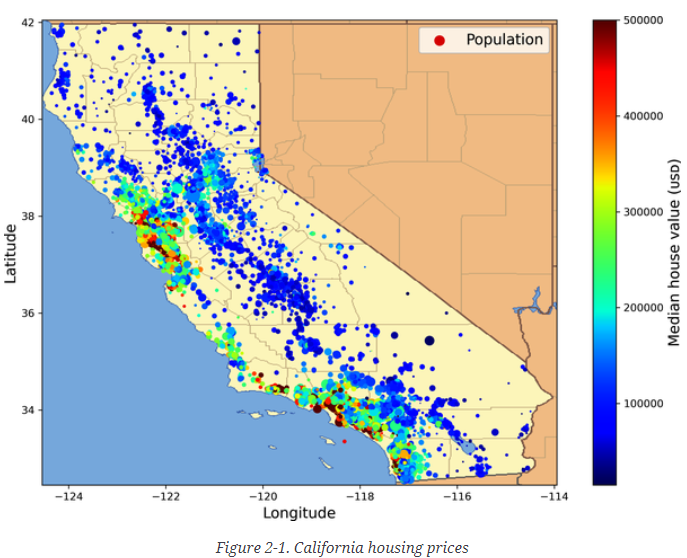
>* we can conclude that: According to the colorbar, the `median_house_value` goes up as long as you get near the ocean...
>* Therefore, the attribute `ocean_proximity` may be effective in dealin with house prices.
>* But is not a simple linear relation as **the northen california districts that near the ocean have low price value**.

In [15]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17950,-118.15,34.16,52.0,1925.0,597.0,2258.0,594.0,1.6921,<1H OCEAN,162500.0
19445,-118.48,34.05,48.0,3623.0,528.0,1282.0,516.0,9.5221,<1H OCEAN,500001.0
15413,-118.25,33.93,42.0,657.0,147.0,526.0,132.0,2.5000,<1H OCEAN,110200.0
4371,-120.54,38.07,37.0,736.0,148.0,339.0,140.0,2.2875,INLAND,79900.0
2921,-117.32,33.17,18.0,2143.0,299.0,828.0,283.0,4.2383,NEAR OCEAN,239000.0


#### Showing the correlation between our traget variable `median_house_value` and other features:
> Don't fill in the trap, weak correlation means only there is no linear relation.

In [16]:
corr = housing.corr() # this returns pandas DataFrame
corr['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688390
total_rooms           0.137549
housing_median_age    0.102016
households            0.071490
total_bedrooms        0.054707
population           -0.020134
longitude            -0.050813
latitude             -0.139603
Name: median_house_value, dtype: float64

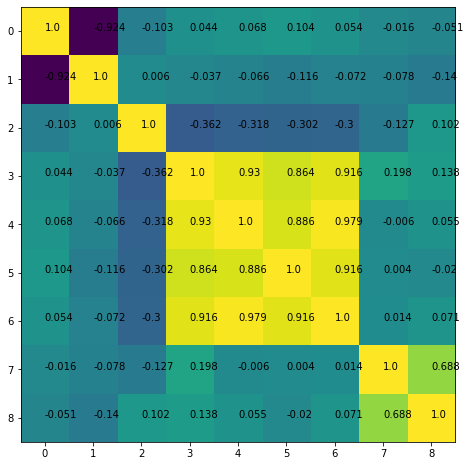

In [17]:
corr = housing.corr()
fig,ax = plt.subplots(1,1,figsize = (8,8))
ax.imshow(corr)
for i in range(9):
    for j in range(9):
        ax.text(i,j,s=round(corr.values[j,i],3))

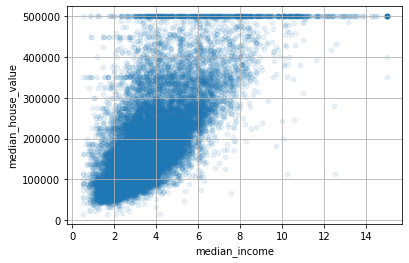

In [18]:
housing.plot(kind='scatter', x ='median_income', y = 'median_house_value', alpha =0.1,grid =True);

> From the previous plot, we noticed there are **some horizontal lines** at 450 000, 450 000, 280 000 ... therefore you should remove those values in order not to make your model affected by this strange data. 

#### Note:
>* Correlation measures only linear relationships ... their may be non-linear relationship that couldn't be measured by correlation.
>* Also correlation coefficient has nothing to do with the slope ... this means correlation of 1 doesn't mean the slope must be 1
> 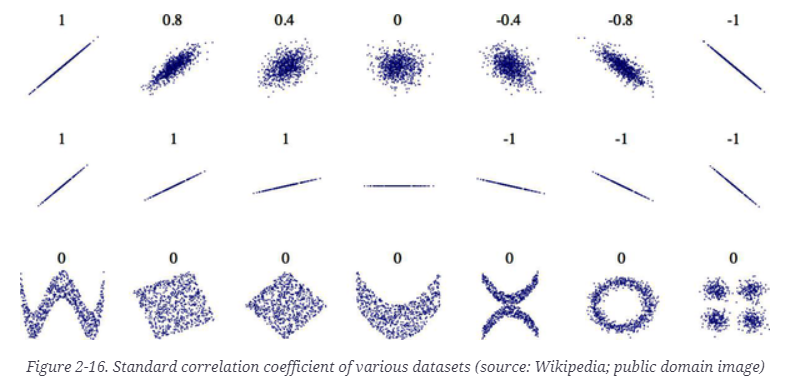

#### We can do some feature engineering Like:

> we don't want the `total_rooms` itself and the `households` itselt, it will more accurate to take the `rooms_per_house` and so on.

In [19]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [20]:
housing.corr()['median_house_value'].sort_values(ascending=False)

# the new feature `rooms_per_house` shows higher corellation than `total_rooms` alone.

median_house_value    1.000000
median_income         0.688390
rooms_per_house       0.143695
total_rooms           0.137549
housing_median_age    0.102016
households            0.071490
total_bedrooms        0.054707
population           -0.020134
people_per_house     -0.038237
longitude            -0.050813
latitude             -0.139603
bedrooms_ratio       -0.256452
Name: median_house_value, dtype: float64

#### Prepare the Data for Machine Learning Algorithms
>It’s time to prepare the data for your machine learning algorithms. Instead of doing this manually, you should write functions for this purpose, for several good reasons:
>* This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).
>* You will gradually build a library of transformation functions that you can reuse in future projects.
>* You can use these functions in your live system to transform the new data before feeding it to your algorithms.
>* This will make it possible for you to easily try various transformations and see which combination of transformations works best.

In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
17950,-118.15,34.16,52.0,1925.0,597.0,2258.0,594.0,1.6921,<1H OCEAN,162500.0,3.240741,0.310130,3.801347
19445,-118.48,34.05,48.0,3623.0,528.0,1282.0,516.0,9.5221,<1H OCEAN,500001.0,7.021318,0.145736,2.484496
15413,-118.25,33.93,42.0,657.0,147.0,526.0,132.0,2.5000,<1H OCEAN,110200.0,4.977273,0.223744,3.984848
4371,-120.54,38.07,37.0,736.0,148.0,339.0,140.0,2.2875,INLAND,79900.0,5.257143,0.201087,2.421429
2921,-117.32,33.17,18.0,2143.0,299.0,828.0,283.0,4.2383,NEAR OCEAN,239000.0,7.572438,0.139524,2.925795


In [22]:
# We first split the data to attributes & labels 
# (we did this before in the train-test split but to we do it again to match the flow of the book )

housing = housing_x
housing_labels = housing_y

#### To handle missing_values, use SckitLearn Classes. ex:`SimpleImputer` instead of `fillna()`:

> The benefit is that you can `fit` the train data "calculate median...etc" and `transform` this fitting to the validate set,test set, or **any new data fed to the model further**. 


In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

# before fitting the imputer to the data, you need to split it to numeric and categorical
# because certain paramteres in this imputer fit_method works with numeric
# only and some works with both:

housing_num = housing.select_dtypes(include = [np.number])
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17950,-118.15,34.16,52.0,1925.0,597.0,2258.0,594.0,1.6921
19445,-118.48,34.05,48.0,3623.0,528.0,1282.0,516.0,9.5221
15413,-118.25,33.93,42.0,657.0,147.0,526.0,132.0,2.5000
4371,-120.54,38.07,37.0,736.0,148.0,339.0,140.0,2.2875
2921,-117.32,33.17,18.0,2143.0,299.0,828.0,283.0,4.2383


#### <font color = 'red'> Important Note:</font>
>* When you use the imputer to fit the data, don't fit only the columns with missing values, but fit all the columns instead.
>* `.fit()` calculates the specified strategy here `median` for each column. `.transform()` impute the median instead of the missing values in the specified column.
>* **It is safer to fit all the columns** not only those with missing values only <font color = 'red'>**because later you may have missing values in new columns**

In [24]:
imputer.fit(housing_num)

imputer.statistics_ , housing_num.median().values

(array([-118.51   ,   34.26   ,   29.     , 2125.     ,  434.     ,
        1167.     ,  408.5    ,    3.53825]),
 array([-118.51   ,   34.26   ,   29.     , 2125.     ,  434.     ,
        1167.     ,  408.5    ,    3.53825]))

In [25]:
print(housing_num.isna().sum())

x = imputer.transform(housing_num)  # x now is the transformed array of all features after applying imputation.

print( np.count_nonzero(np.isnan(x)) )  # this is how to count the nan_values for the array not dataframe  

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
dtype: int64
0


In [26]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns,
                          index=housing_num.index)


####  <font color = 'red'> Note: </font> There are other effective imputers in `sklearn.impute` like `KNNImputer` or `IterativeImputer` :
>* `KNNImputer`:replaces each missing value with ***the mean* of the k-nearest neighbors’ values** for that feature. The distance between the k-nearest neighbour of each instance is based on all the available features.
>* `IterativeImputer`:**trains a regression model per feature** to predict the missing values based on all the other available features. It **then trains the model again on the updated data, and repeats the process several times**, improving the models and the replacement values at each iteration.
________________________________

>* Consistency
All objects share a consistent and simple interface:
>>* Estimators
>>>* Any object that can estimate some parameters based on a dataset is called an estimator (e.g., a `SimpleImputer` is an estimator). The estimation itself is performed by the `fit()` method, and it takes a dataset as a parameter, or two for supervised learning algorithms—the second dataset contains the labels. Any other parameter needed to guide the estimation process is considered a hyperparameter (such as a `SimpleImputer`’s `strategy`), and it must be set as an instance variable (generally via a constructor parameter).
>>* Transformers
>>>* Some estimators (such as a `SimpleImputer`) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the `transform()` method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a SimpleImputer. All transformers also have a convenience method called `fit_transform()`, which is equivalent to calling `fit()` and then transform() (but sometimes `fit_transform()` is optimized and runs much faster).
>>* Predictors
>>>* Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. For example, the `LinearRegression` model in the previous chapter was a predictor: given a country’s GDP per capita, it predicted life satisfaction. A predictor has a `predict()` method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a `score()` method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms).10
>* Inspection
>>* All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., `imputer.strategy`), and all the estimator’s learned parameters are accessible via public instance variables with an underscore suffix (e.g., `imputer.statistics_`).
>* Nonproliferation of classes
>>* Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.
>* Composition
>>* Existing building blocks are reused as much as possible. For example, it is easy to create a Pipeline estimator from an arbitrary sequence of transformers followed by a final estimator, as you will see.
>* Sensible defaults
>>* Scikit-Learn provides reasonable default values for most parameters, making it easy to quickly create a baseline working system.

In [27]:
# Machine Learning prefer to work with categories:

housing_cat = housing.select_dtypes(exclude = [np.number])

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:9]

array([[0.],
       [0.],
       [0.],
       [1.],
       [4.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [28]:
# you can get the list of your encoded categories using:

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### The above OrdinalEncoder may run into a problem like that:

>* Category 0 `>1H OCEAN` & Category 4 `NEAR OCEAN` should have encoded values near to each other (not far from each other like 0 & 4) ... 
>* Also if the number of categories we have is larger like 10 categories (the differecne will be larger). **Therfore, the solution is to try to use `OneHotEncoding`**

In [87]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# OUTPUT is a SciPy sparce matrix with shape (n_instances x n_categories) instead of NumpyArray 
sys.getsizeof(housing_cat_1hot)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [86]:
sys. getsizeof(housing_cat_1hot.toarray()) , (16512 *  32)

(660600, 528384)

>* The **`Scipy SparseMarix`** that `OneHotEncoder` display output in is effecient than **`Numpy Array`** in the memory usage. (This because the SparceMatrix only stores the values 1 not 0 & 1 like in NumPy Array)
>* Therefore to deal with large data and decided to use `OneHotEncoding` it is better to to **use the SparceMatrix and not convert it to (dense) NumpyArray**.

In [30]:
import sys
sys. getsizeof(housing_cat_1hot) # 48
sys.getsizeof(housing_cat_1hot.toarray()) # 660600

660600

In [31]:
# you can convert this sparce matrix of shape(n_instances x n_categories) to 
# a dense (Dense) NumPy array of of the same shape but large in memory.

housing_cat_1hot.toarray() 


# or you can set (sparce =False) while calling OneHotEncoder ... 

demo_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot_demo = demo_encoder.fit_transform(housing_cat)
housing_cat_1hot_demo

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [32]:
cat_encoder.categories_

# the same method used with OrdinalEncoder

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Why `OneHotEncoder()` not `pd.get_dummies()`:
>* `OneHotEncoder()` learns or fit the categories of the column and createse columns according to the number of the categories exist... and it has `.transform()` which enables it to transform those learnt categories to the validate_set, test_set,..etc.
>* `OneHotEncoder()` is smarter: it will detect the unknown category and raise an exception.
>* If you prefer,**you can set the `handle_unknown` hyperparameter to `"ignore"`,** in which case it will just represent the unknown category with zeros.

#### If the categorical features has many categories you have two solutions:
>* Covert the categorical feature into numerical one if possible. (you could replace the `ocean_proximity` feature with the `distance to the ocean` "similarly, a country code could be replaced with the country’s population and GDP per capita").
>* Try another type of encoding that `OneHotEncoding`. There is a category called `category_encoders`[Click Here](https://github.com/scikit-learn-contrib/category_encoders)

#### In most cases, models cannot work with different features of different scaling:
>* Models in this case may *tend to be biased toward ignoring the low scale and focus on the features with large scale only*.
>* If we have certain column with higher range between its values ,,, its better to scale it because gradient descent performs faster when scale is small.(مش متأكد من النقطة دى)
>* Therefore we should scale our feature by either `min-max scaling (AKA: Normalization)` or `Z-score scaling (AKA: standardization)`.
>* <font color = 'red'>**Note:**</font> you fit the `MinMaxScaler` **only on the training data**, and then transform it on the validate, test, or any new data.
>* <font color = 'red'>**Another Note:**</font> when you fit new data, the scaling should be within a specified range using the learnt 'min','max','mean','std' of the traning data..etc.
>* but if this new data contains outliers, this outlier will be scaled outside the range.
>* <font color = 'red'>**Another Note:**</font> there is a hyper-parameter called `clip = True` this prevents any value to be scaled outside the range. **(Also, you can customly set this range from (0 => 1) to any range you want)** ... but take care as this clip may form a strange column at the max_value if you plot the histogram because all greater values than the maximum will be set at the max.


In [33]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaled.shape


#The following is how change default scaling works under the hood:

import numpy  as np

X = np.array([[-1, 2], [-0.5, 6]])


def min_max_scale(X, range=(0, 1)):
    mi, ma = range
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (ma - mi) + mi
    return X_scaled

print(min_max_scale(X))

[[0.         0.42857143]
 [0.07142857 1.        ]]


#### `StandardScaler` is less affected by outliers tha
> standardization with `StandardScaler` is much less affected by outliers. For example, suppose a district has a median income equal to 100 (by mistake), instead of the usual 0–15. Min-max scaling to the 0–1 range would map this outlier down to 1 and it would crush all the other values down to 0–0.15, whereas standardization would not be much affected.

In [34]:
from sklearn.preprocessing import StandardScaler 

std_scale = StandardScaler() 
housing_num_std_scaled = std_scale.fit_transform(housing_num)


#### Dealing with SparseMatrix:
>* if we want to use the StandardScaler on a sparseMatrix, we shouldn't subtract the mean from the data... because this will break sparcity therefore we can set `with_mean = False` in `StandardScaler` object.

> when you do scaling... take care of this:
>* if you used `MinMaxScaler` with feature whose distribution has heavy tail (skewed histogram), your data will squash to be in a small range because in this case there are outliers. **Therfore, you should do power transformation first** to make it normally distributed. therefore scaling will be good. (like the example above of 0-15 and an outlier of 100)
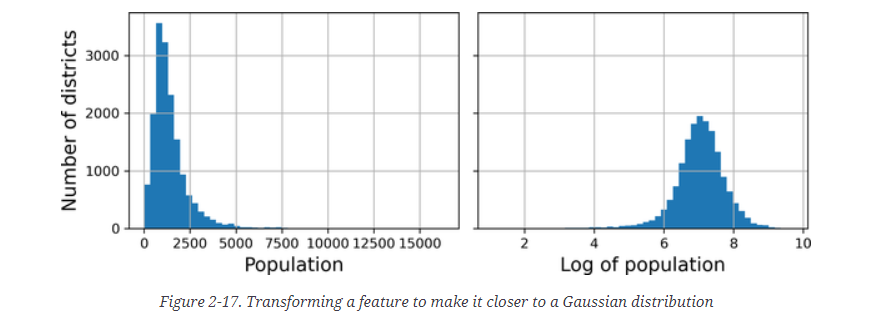
>* The `sqrt` & `log` are superior when the data is skewed riht.(this is because the nature of log or square root whose values increases by small amount as you go right.)
______________________

#### Different technique to handle skewed data:
>* 1.try **power transformation** to make them normally distributed.
>* 2.try **bucketizing** (like using qcut() ... this creates uniform distribution of the resulted buckets)[**Read This**](https://developers.google.com/machine-learning/data-prep/transform/bucketing)
>>* **Buckets with equally spaced boundaries** (it works well for many types of distributions)
>>* **Buckets with quantile boundaries** (it works well with skewed distributions because each bucket consists of uniform distributions)
>* 3.try `radial basis function (RBF)` [**See this**](https://www.youtube.com/watch?v=-Gsifd-yf7E&t=626s)

##### Don't forget, we do so <font color = 'red'>because the skewed data is bad</font> because:
>* - if we do scaling, the data is crampled in a tiny range due to the existence of the outliers. Therefore we make our features with low range by taking the log instead. "we do scaling at first because gradient descent to work faster مش متأكد"
>>* Note: Log is used only with right-skewed... quadratic is used with left skewed... box-cox is above them all.
>* - some distance-based algorithms works well with normal distribution rather than skewed distribution.
____________________________

>* We sometimes need to transform the label-column ... like if the label-column shows skewed distribution or distribution with heavy tail, we may take the log of it ... **But in this case, the LinearRegression Model will predict the log of value not the actual value** ... *therefore we still need to take the reverse of the log (exponential.)*
>* some estimators like `StandardScaler` have method called `.inverse_transform()` used often with labels to convert them to original after applying transformation.
>* Another opinions says it is bad to scale the label-column.

In [35]:
# here is the code

from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) # we used .to_frame() to conver the series to DataFrame
                                                                       # because StandardScaler expects 2D input.
                                                                       # instead of .to_frame(), we can use square brackets housing[['']]
                                                                       # that converts series to DataFrame
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [36]:
# the above may be done by: 
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

> **Should we Normalize the target column?!**
>* Since you mentioned price column I assume you are dealing with a regression problem. Scaling the target variable depends upon the spread / range in which the target values lie. If the range is large, then you must scale the values because target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically or might explode and hence making the learning process unstable.

In [37]:
# sometimes you need to create your custom transformer to have methods
# like .transform(), .fit() ...etc

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

# also 

from sklearn.base import BaseEstimator, TransformerMixin
# those two are parent class , inherited to your custom class of your 
# custom transfor mer

# .... There are more details

#### Trransformation Pipelines:
> It is useful in case you want to do multiple operations on your model like: (imputing missing values => then scaling ...etc )
>* `from sklearn.pipeline import Pipeline` Pipline is a class...its constructor takes a list of name/estimator pairs (2-tuples) defining a sequence of steps.
>* Don't contain `__` while naming your transformer.
>* The estimators **must all be transformers (i.e., they must have a `fit_transform()` method)**, *except for the last one,* which can be anything: a transformer, a predictor, or any other type of estimator.

In [38]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [39]:
# this code is to visualize the pipeline in an interactive window

import sklearn
sklearn.set_config(display="diagram")
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

>* When you call the pipeline’s `fit()` method, it calls `fit_transform()` sequentially on all the transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it just calls the `fit()` method.

>* The pipeline exposes the same methods as the final estimator. In this example the last estimator is a StandardScaler, which is a transformer, so the pipeline also acts like a transformer. If you call the pipeline’s `transform()` method, it will sequentially apply all the transformations to the data. If the last estimator were a predictor instead of a transformer, then the pipeline would have a `predict()` method rather than a `transform()` method. Calling it would sequentially apply all the transformations to the data and pass the result to the predictor’s `predict()` method.

>* Pipelines support indexing; for example, `num_pipeline[1]` returns the second estimator in the pipeline. Also, `num_pipeline["simpleimputer"]` returns the estimator named "simpleimputer".

>* If you want ot have separate pipelines, one for numeric columns and other for categorical ones ... if you want to specify the number of columns to a given pipeline, you can use `from sklearn.compose import ColumnTransformer`


In [59]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = Pipeline([
    ("simpleImputer",SimpleImputer(strategy="most_frequent") ),
    ("HotEncoder",OneHotEncoder(handle_unknown="ignore") ) 
    ])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),   # here the transformer (first pipeline is given the name "num")
    ("cat", cat_pipeline, cat_attribs),   # here the transformer (second pipeline is given the name "cat")
])


In [61]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleImputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('HotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

> instead of the above explict representation of columns' names, we can specify the selector like this:


In [41]:
from sklearn.compose import make_column_selector

preprocessing = ColumnTransformer([
        ("num",num_pipeline, make_column_selector(dtype_include = np.number) ),
        ("cat",cat_pipeline, make_column_selector(dtype_include = object) )
        ])

> After we made two piplines and combine them together, we should apply them:

In [42]:
housing_prepared = preprocessing.fit_transform(housing)

>* Great! We have a preprocessing pipeline that takes the entire training dataset and applies each transformer to the appropriate columns, then concatenates the transformed columns horizontally (transformers must never change the number of rows).
>* Once again this returns a NumPy array, but you can get the column names using `preprocessing.get_feature_names_out()` and wrap the data in a nice DataFrame as we did before.

>* The `OneHotEncoder` returns a sparse matrix and the `num_pipeline` returns a dense matrix. **When there is such a mix of sparse and dense matrices, the ColumnTransformer estimates the density of the final matrix** (i.e., the ratio of nonzero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, `sparse_threshold=0.3`). In this example, it returns a dense matrix.

In [43]:
housing_prepared.shape

(16512, 13)

>* 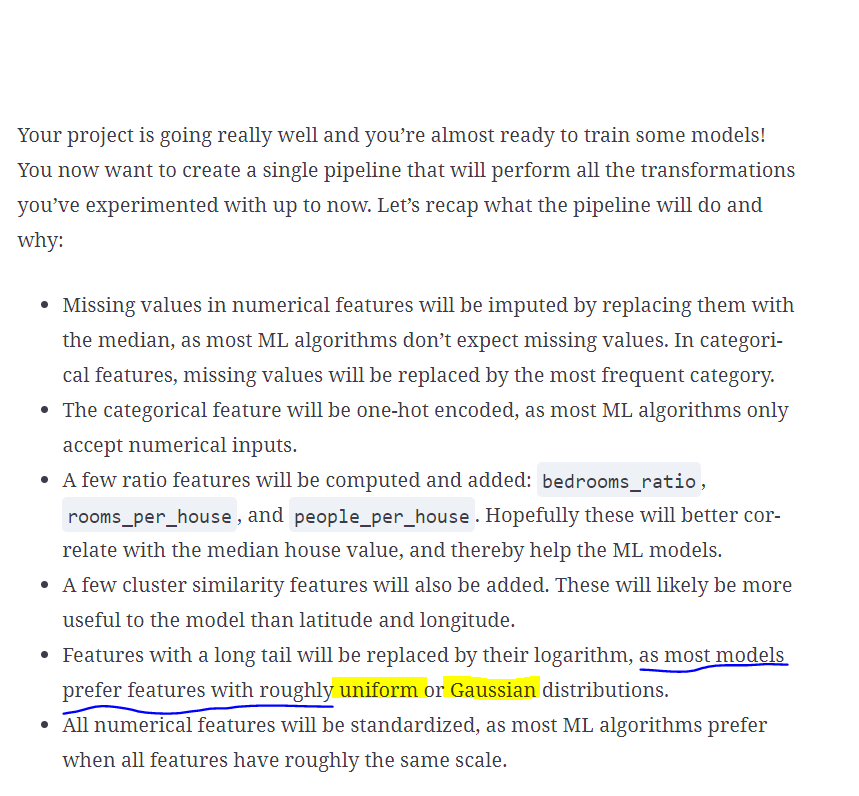

In [ ]:
# code for whole pipeline:
from sklearn.pipeline import make_pipeline

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

#### Select and train the model:


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

# here we didn't fit() the "housing_prepared" but "housing_prepared" we fit "housing"
# because what we choose is fitted to the whole pipline from the beginnnig
# so if we fit() "housing_prepared", we will do the same steps twice

# important to look at the diagram of the pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A6D469A60>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('HotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A6DE49520>)])),
                ('linearregression', LinearRegression())])

In [46]:
predictions = lin_reg.predict(housing)

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels,predictions,squared= False)
# if squared = True, it will return MSE ... if squared = False, it will return RMSE
lin_rmse

68228.989111156

Such high error on training, inferes that this is an uncderfitting and to solve it you have 3 options:
>* Add more powerful features or data to your model
>* Choose more powerful model
>* Reduce the constraints on your model (in case of you made regularization) but in our case, the model is not regularized.


In [47]:
# we try to use `DecesionTreeRegressor`:

from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())
tree_reg.fit(housing,housing_labels)

# we replaced the previous model with DecisonTreeRegressor so we used the preprocessing pipline to add on top of it ... not the lin_reg pipeline


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A6D469A60>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('HotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A6DE49520>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [48]:
mean_squared_error(housing_labels,tree_reg.predict(housing) , squared = False)

0.0

#### What an overfitting !!! 
<font color = 'green'>**(we should check if this overfitting or just the model is actually super ... this is done by comparing the training and validation error):**</font>
>* until now, we shouldn't use our test_set to hypertune the model, we should use validation set instead. 
>* Therefore, we manages to use `cross_validation` technique.
>* Cross_validation is better than using only one validation set because it is more accurate as it gives you average of all the data, as it seems that you train your model on all the data and test it on all the data.

In [49]:
from sklearn.model_selection import cross_val_score

tree_validation_score = cross_val_score(tree_reg, housing, housing_labels,cv=10,
                                           scoring = 'neg_root_mean_squared_error')
- tree_validation_score

array([70610.93773298, 71897.30817416, 71352.11890765, 69102.38273381,
       67111.19033189, 64156.16680404, 67573.03986307, 68000.69621739,
       65795.6158528 , 69892.46840992])

> Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the RMSE. It’s a negative value, so you need to switch the sign of the output to get the RMSE scores.

In [50]:
pd.Series(- tree_validation_score).describe()

count       10.000000
mean     68549.192503
std       2486.182024
min      64156.166804
25%      67226.652715
50%      68551.539476
75%      70431.320402
max      71897.308174
dtype: float64

### 💣 Important:
______________________________________
<font color = 'red'>**💣⚠️💣Very important Note:**</font> the above error **is not the training error** but the `validation error`
>* 🎈 After we divided the sets to folds, we calculate the validation error for each validatoin not for training set
______________________________________
<font color = 'red'>**💣⚠️💣Second important Note:**</font>
>* 🎈 In case of Linear Regression Model, we found that: there is a high training_error ... which indicates underfitting, so we changed the model.
>* 🎈 When we used `Decision_tree_regressor`, we found that: there is a very low trainning_error ... which signs the probability of overfitting ... to check if there is overfitting or not, we used the validation_set (and better cross_validation)... and found that there is high validation_error ---> (low training error & high validation error) this is the case of overfitting.
______________________________________

> Notice that `cross-validation` allows you to get not only an estimate of the performance of your model, **but also a measure of how precise this estimate is (i.e., its standard deviation)**. The decision tree has an RMSE of about 66,868, with a standard deviation of about 2,061. You would not have this information if you just used one validation set. *But cross-validation comes at the cost of training the model several times*, so it is not always feasible.
___________________________

In [51]:
# due to the above overfitting, we try another model which is:
# randomForest which uses a kind ensemble learning.

# random forests work by training many decision trees
# on random subsets of the features, then averaging out their predictions.
# Such models composed of many other models are called ensembles: they 
# are capable of boosting the performance of the 
# underlying model (in this case, decision trees)

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state = 42))

forest_reg.fit(housing, housing_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A6D469A60>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('HotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018A6DE49520>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [54]:
mean_squared_error( housing_labels, forest_reg.predict(housing),squared = False )

18140.91963243031

In [55]:
forest_rmse = - cross_val_score(forest_reg, housing, housing_labels,
                               scoring="neg_root_mean_squared_error", cv =10)


In [56]:
pd.Series(forest_rmse).describe()

count       10.000000
mean     48750.772391
std       1626.692344
min      46449.926281
25%      47283.449545
50%      49013.875552
75%      49806.023666
max      51439.771152
dtype: float64

In [57]:
# train error is quite small, and validation is high therefore  this may indicate some overfitting (but can be ignored) in case you want to 
# handle it, you can try:
# 1. simplifing the model by removing some features unnecessary.
# 2. regularize it. (I think this is a kind of hyper-parameters tuning)
# 3. use other models like (SVM with different kernels... or neural networks ... etc).

> To fine tune your model, you could use:
>* **GridSearchCV** ... CV here is for cross-validation.
>* **RandomizedSearchCV** ... CV here is for cross-validation.
>* Use **Ensemble models** ... as randomforeset performs better than decision tree ... you can use the same idea and create your ensemble.

>* It is Better to see them from HandsOnMachineLearning book but think of the benefits of RandomSearch GridSearch (mainly when hyperparameters have large space):
>>* If some of your hyperparameters are continuous (or discrete but with many possible values), and you let randomized search run for, say, 1,000 iterations, then it will explore 1,000 different values for each of these hyperparameters, whereas grid search would only explore the few values you listed for each one.
>>* Suppose a hyperparameter does not actually make much difference, but you don’t know it yet. If it has 10 possible values and you add it to your grid search, then training will take 10 times longer. But if you add it to a random search, it will not make any difference.
>>* If there are 6 hyperparameters to explore, each with 10 possible values, then grid search offers no other choice than training the model a million times, whereas random search can always run for any number of iterations you choose.
>* For each hyperparameter, you must provide either a **list of possible values**, or a **probability distribution**
_______________________

In [ ]:
# To fine_tune the model, you may choose different combinations of hyperparamter, to do them, you can use them:


# GridSearchCV:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

##################################################################################


# RandomizedSearchCV:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)


#### Analyzing the Best Models and Their Errors:

> The above **`RandomizedSearchCV`** has an important attribute: `best_estimator_`. It returns the estimators (name of the models). From this you can use them to know your features importance & therefore selects which features to get and to disregard. 

In [ ]:
>>> final_model = rnd_search.best_estimator_  # includes preprocessing
>>> feature_importances = final_model["random_forest"].feature_importances_
>>> feature_importances.round(2)
array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, [...], 0.01])


>>> sorted(zip(feature_importances,
...            final_model["preprocessing"].get_feature_names_out()),
...            reverse=True)
...
[(0.18694559869103852, 'log__median_income'),
 (0.0748194905715524, 'cat__ocean_proximity_INLAND'),
 (0.06926417748515576, 'bedrooms__ratio'),
 (0.05446998753775219, 'rooms_per_house__ratio'),
 (0.05262301809680712, 'people_per_house__ratio'),
 (0.03819415873915732, 'geo__Cluster 0 similarity'),
 [...]
 (0.00015061247730531558, 'cat__ocean_proximity_NEAR BAY'),
 (7.301686597099842e-05, 'cat__ocean_proximity_ISLAND')]


'''
With this information, you may want to try dropping some of the less useful features 
(e.g., apparently only one ocean_proximity category is really useful, so you could try dropping the others).
'''

>The **`sklearn.feature_selection.SelectFromModel`** transformer can automatically drop the least useful features for you: when you fit it, it trains a model *(typically a random forest)*, looks at its `feature_importances_` attribute, and selects the most useful features. Then when you call `transform()`, it drops the other features.

> <font color = 'red'> **"Important Note"** </font> 
>* You should nsure that your model not only works well on average, but also on all categories of districts, whether they’re rural or urban, rich or poor, northern or southern, minority or not, etc.
>* Creating subsets of your validation set for each category takes a bit of work, but it’s important:
>> If your model performs poorly on a whole category of districts, then it should probably not be deployed until the issue is solved, or at least it should not be used to make predictions for that category, as it may do more harm than good.

#### Evaluate on the test set:


In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy() 

# the above two will be replaced by the output of train-test split, but here it is used previously in a different way. 
final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)  # prints 41424.40026462184

#############################################################################################
'''
In some cases, such a point estimate of the generalization error will not be quite enough to 
convince you to launch: what if it is just 0.1% better than the model currently in production? 
You might want to have an idea of how precise this estimate is. For this, you can compute a 
95% confidence interval for the generalization error using scipy.stats.t.interval(). 
You get a fairly large interval from 39,275 to 43,467, and your previous point estimate of 41,424 is 
roughly in the middle of it:
'''

>>> from scipy import stats
>>> confidence = 0.95
>>> squared_errors = (final_predictions - y_test) ** 2
>>> np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
...                          loc=squared_errors.mean(),
...                          scale=stats.sem(squared_errors)))
...
array([39275.40861216, 43467.27680583])

#### After The model is evaluated anc accepted, you:
>* Deploy it in production.(either in any place but try to make it portable "runs on all environments not only python-supported" & don't forget to import any custom-classes you have made for the model.)
>* Track it to monitor any disturbance:
>>* you could trigger an alert if more and more inputs are missing a feature, or the mean or standard deviation drifts too far from the training set, or a categorical feature starts containing new categories
>>* and so on ... **See the Full details from Hands On Chapter 2 & chapter 19 (About MLOps)**

___________________________________________